In [ ]:
from rdkit import Chem
from model import MolGen

# load data
data = []
with open('qm9.csv', "r") as f:
    for line in f.readlines()[1:]:
        data.append(line.split(",")[1])

# create model
gan_mol = MolGen(data, hidden_dim=64, lr=1e-3, device="cuda")

In [ ]:
# create dataloader
loader = gan_mol.create_dataloader(data, batch_size=128, shuffle=True, num_workers=10)

# train model for 10000 steps
gan_mol.train_n_steps(loader, max_step=20000, evaluate_every=100)

In [ ]:
gan_mol.eval()

print('ok')

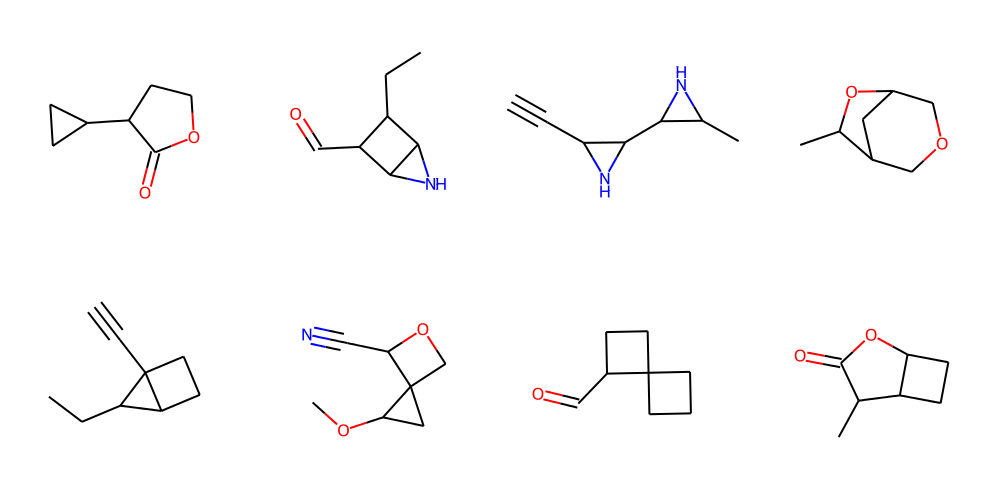

In [138]:
# After training
# generate Smiles molecules
smiles_list = gan_mol.generate_n(8)

# convert with rdkit
mol_list = [Chem.MolFromSmiles(m) for m in smiles_list]

# draw
Chem.Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(250, 250), maxMols=10)